In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.sample(10)

,Member_number,Date,itemDescription
33583,1290,18-02-2014,rice
35055,2634,22-04-2015,newspapers
17267,3715,11-05-2015,whole milk
38430,1006,11-07-2014,skin care
16599,3598,15-04-2015,UHT-milk
32643,3430,16-04-2015,hygiene articles
12152,1881,18-08-2014,soda
9448,1916,21-05-2014,citrus fruit
12124,2747,17-09-2014,whole milk
38470,1506,25-12-2014,oil


In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [7]:
df.rename(columns = {"Member_number" : "Customer_ID" , "itemDescription" : "Item Name" } , inplace = True)

In [8]:
df.shape

(38765, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer_ID  38765 non-null  int64         
 1   Date         38765 non-null  datetime64[ns]
 2   Item Name    38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


## No null data is present

## First transaction in the dataset is recorded at 1st January 2014

In [10]:
df.iloc[df["Date"].argmin()]

Customer_ID                   2351
Date           2014-01-01 00:00:00
Item Name                  cleaner
Name: 9132, dtype: object

## Most recent transaction in the dataset is recorded at 30th December 2015

In [11]:
df.iloc[df["Date"].argmax()] 

Customer_ID                   2810
Date           2015-12-30 00:00:00
Item Name              frankfurter
Name: 270, dtype: object

In [12]:
# To confirm the starting date or ending date we can sort by dates as well

df.sort_values(by = 'Date')

,Customer_ID,Date,Item Name
15338,1381,2014-01-01,curd
9172,2226,2014-01-01,sausage
31684,1659,2014-01-01,frozen vegetables
13247,2610,2014-01-01,hamburger meat
13242,3942,2014-01-01,other vegetables
...,...,...,...
20822,3579,2015-12-30,herbs
19048,3562,2015-12-30,ice cream
34960,3562,2015-12-30,rolls/buns
17955,1963,2015-12-30,citrus fruit


In [13]:
df['Date'].min() - df['Date'].max()

# That is we have almost 2 years worth of data
# Interesting Observation - Store has been closed for just 2 days in this span of 2 years or there is no data for 2 days

Timedelta('-728 days +00:00:00')

## Different Insights that come to mind
### 1. Overall sales trend for the enitire dataset
### 2. Monthly Sales -- Best month for sales
### 3. Weekly Sales -- Best Week for sales -- Or best day for sales -{Monday to Sunday -- which is the best day for sales??}
### 4. Top 10 Customers who spent the most.
### 5. Top 10 sold products
### 6. Buying frequency -- A.K.A. how often a customer comes to the store and buys an Item.
### 7. Number of unique items in the store
### 8. Number of unqiue customers

In [14]:
df

,Customer_ID,Date,Item Name
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


## Q-8.    Number of unique customers in the dataset

In [15]:
# .unique() returns a series with all the unique customer id

df.Customer_ID.unique()

array([1808, 2552, 2300, ..., 3607, 4587, 2417], dtype=int64)

In [16]:
len(df.Customer_ID.unique())

3898

In [17]:
# We can use nunique() instead -- This method excludes Null data by default

df.Customer_ID.nunique()

3898

### Creating a data frame where we use the Date column as our index

In [18]:
df_date = df.set_index('Date')
df_date

,Customer_ID,Item Name
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


In [19]:
# This gives our 2014 data

df_date.loc['2014']

,Customer_ID,Item Name
Date,,
2014-01-10,1664,rolls/buns
2014-12-16,3942,hamburger meat
2014-10-10,2638,turkey
2014-10-10,4735,specialty chocolate
2014-09-12,3745,frankfurter
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


In [20]:
# This gives our 2015 data

df_date.loc['2015']

,Customer_ID,Item Name
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2015-08-24,1185,chocolate
2015-12-25,4656,newspapers
2015-11-09,2741,canned vegetables


In [21]:
df

,Customer_ID,Date,Item Name
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [22]:
# Gives the total quantities sold per day --- Daily Sales

req = df_date.groupby('Date')['Item Name'].size()
req

Date
2014-01-01    48
2014-01-02    62
2014-01-03    54
2014-01-04    64
2014-01-05    44
              ..
2015-12-26    37
2015-12-27    74
2015-12-28    58
2015-12-29    57
2015-12-30    53
Name: Item Name, Length: 728, dtype: int64

<AxesSubplot:xlabel='Date'>

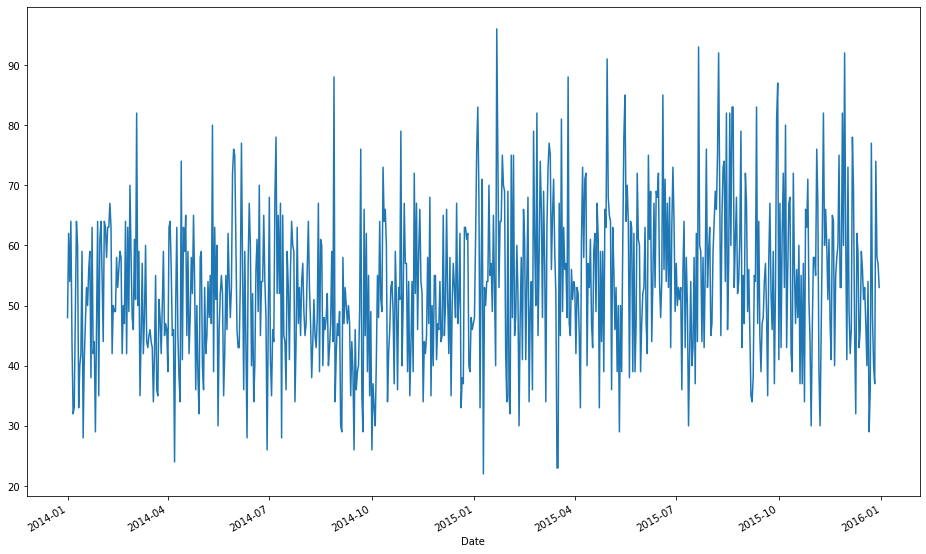

In [23]:
plt.figure(figsize=(16, 10))
req.plot()

## Total unique customers by month

## Q-1. Overall sales trend for the enitire dataset

## Weekly Sales

In [24]:
# Weekly Sales

Sales_weekly = df.resample('w', on='Date').size()

In [25]:
type(Sales_weekly)

pandas.core.series.Series

In [26]:
Sales_weekly

Date
2014-01-05    272
2014-01-12    311
2014-01-19    320
2014-01-26    331
2014-02-02    369
             ... 
2015-12-06    390
2015-12-13    356
2015-12-20    360
2015-12-27    341
2016-01-03    168
Freq: W-SUN, Length: 105, dtype: int64

In [27]:
Sales_weekly.values

array([272, 311, 320, 331, 369, 441, 357, 362, 395, 379, 328, 289, 342,
       359, 328, 374, 363, 316, 371, 341, 347, 438, 356, 355, 362, 346,
       348, 407, 334, 371, 350, 353, 363, 317, 361, 311, 312, 312, 331,
       251, 404, 355, 336, 389, 349, 378, 339, 334, 369, 346, 346, 365,
       362, 354, 404, 444, 394, 383, 356, 336, 449, 410, 455, 351, 397,
       350, 408, 382, 372, 456, 343, 405, 400, 365, 393, 424, 440, 421,
       377, 337, 336, 401, 399, 494, 439, 479, 412, 371, 375, 339, 354,
       434, 439, 360, 346, 363, 371, 442, 370, 475, 390, 356, 360, 341,
       168], dtype=int64)

In [28]:
x1 = Sales_weekly.values

In [29]:
# We can also write like this

# We mention the column name and the aggregate function we want to perform on it

sales_weekly1 = df.resample('w', on='Date')['Item Name'].count()  
    
sales_weekly1

Date
2014-01-05    272
2014-01-12    311
2014-01-19    320
2014-01-26    331
2014-02-02    369
             ... 
2015-12-06    390
2015-12-13    356
2015-12-20    360
2015-12-27    341
2016-01-03    168
Freq: W-SUN, Name: Item Name, Length: 105, dtype: int64

In [30]:
sales_weekly2 = df.resample('w', on='Date')['Item Name'].size()
sales_weekly2

Date
2014-01-05    272
2014-01-12    311
2014-01-19    320
2014-01-26    331
2014-02-02    369
             ... 
2015-12-06    390
2015-12-13    356
2015-12-20    360
2015-12-27    341
2016-01-03    168
Freq: W-SUN, Name: Item Name, Length: 105, dtype: int64

In [31]:
# This concatenates the Item Names

sales_weekly3 = df.resample('w', on='Date')['Item Name'].sum()
sales_weekly3

Date
2014-01-05    cleanersausagetropical fruitwhole milkcitrus f...
2014-01-12    citrus fruitporknapkinsoilbottled beerbottled ...
2014-01-19    photo/filmwhole milkporksodawhole milkseasonal...
2014-01-26    porksausagepastryporkwhole milkmeatcoffeepastr...
2014-02-02    candyhamburger meatwhole milkhamburger meatroo...
                                    ...                        
2015-12-06    tropical fruitbottled watermeatcoffeeroot vege...
2015-12-13    butterother vegetablesfrozen fishpip fruitbeve...
2015-12-20    sausagecurdherbsshopping bagstropical fruitwho...
2015-12-27    bottled wateryogurtsodasausagerolls/bunsbottle...
2016-01-03    onionsroot vegetablescitrus fruitrolls/bunsham...
Freq: W-SUN, Name: Item Name, Length: 105, dtype: object

<AxesSubplot:xlabel='Date'>

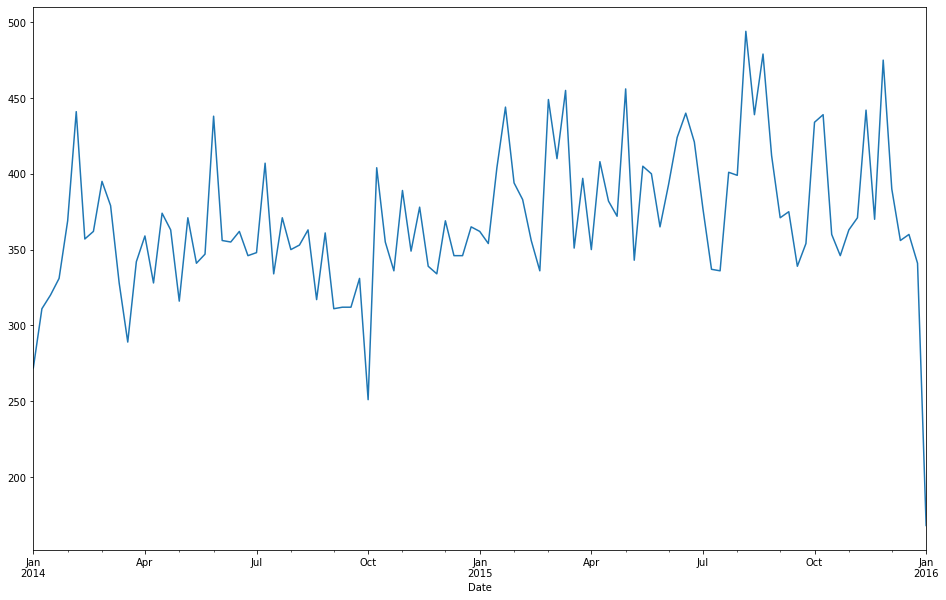

In [32]:
plt.figure(figsize=(16, 10))
Sales_weekly.plot()

## Number of new weekly customers
### Method 1 - using resample

In [33]:
Unique_customer_weekly = df.resample('w', on='Date').Customer_ID.nunique()

In [34]:
Unique_customer_weekly

Date
2014-01-05    121
2014-01-12    132
2014-01-19    139
2014-01-26    146
2014-02-02    160
             ... 
2015-12-06    123
2015-12-13    115
2015-12-20    129
2015-12-27    116
2016-01-03     60
Freq: W-SUN, Name: Customer_ID, Length: 105, dtype: int64

In [35]:
x2 = Unique_customer_weekly.values

In [36]:
Unique_customer_weekly1 = df.resample('w', on='Date')['Customer_ID'].value_counts()
print(Unique_customer_weekly1.head(122))

# This code gives the weekly output where the Customer Id gives the unique Customers and number of times that customer visited

# As we can see that this code and the above code works similar ----

# Here if we fetch 122 records from top that is from 2014-01-05 to 2014-01-12 we see that there are 121 unique customer IDs
# And 122nd unique record goes to the next week starting from 2014-01-12

Unique_customer_weekly1.head(254) # So doing 254 we go into the 3rd week greater than 121+132

Date        Customer_ID
2014-01-05  2480           5
            2760           4
            3382           4
            3765           4
            3956           4
                          ..
            4879           2
            4933           2
            4942           2
            4943           2
2014-01-12  3628           6
Name: Customer_ID, Length: 122, dtype: int64


Date        Customer_ID
2014-01-05  2480           5
            2760           4
            3382           4
            3765           4
            3956           4
                          ..
2014-01-12  4870           2
            4900           2
            4933           2
            4938           2
2014-01-19  1065           4
Name: Customer_ID, Length: 254, dtype: int64

<AxesSubplot:xlabel='Date'>

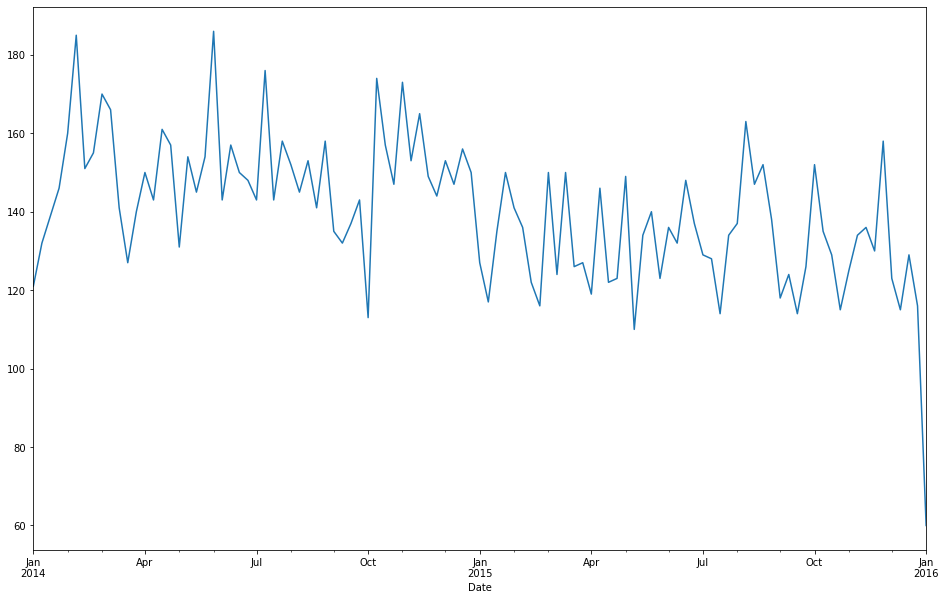

In [42]:
plt.figure(figsize=(16, 10))
Unique_customer_weekly.plot()

In [38]:
### Method 2 - using groupby

'''
Example -----

import pandas as pd
from datetime import timedelta

# Sample data - Replace this with your actual dataframe
data = pd.DataFrame({
    'Customer ID': [101, 102, 101, 103, 102, 104, 103, 101],
    'Item Name': ['Product A', 'Product B', 'Product A', 'Product C', 'Product B',
                  'Product A', 'Product D', 'Product B'],
    'Date': pd.to_datetime(['2023-07-01', '2023-07-03', '2023-07-05', '2023-07-06',
                           '2023-07-09', '2023-07-12', '2023-07-15', '2023-07-18']),
})

# Assuming your 'Date' column is already in datetime format. If not, you can convert it like this:
# data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by 'Date'
data = data.sort_values(by='Date')

# Get the minimum date in the dataset to start the weekly periods
min_date = data['Date'].min()

# Create a new column to store the weekly periods
data['Week'] = (data['Date'] - min_date) // timedelta(weeks=1)

# Group the data by 'Week' and count the number of unique 'Customer ID's
new_customers_per_week = data.groupby('Week')['Customer ID'].nunique()

# Print the result
print(new_customers_per_week)

'''

"\nExample -----\n\nimport pandas as pd\nfrom datetime import timedelta\n\n# Sample data - Replace this with your actual dataframe\ndata = pd.DataFrame({\n    'Customer ID': [101, 102, 101, 103, 102, 104, 103, 101],\n    'Item Name': ['Product A', 'Product B', 'Product A', 'Product C', 'Product B',\n                  'Product A', 'Product D', 'Product B'],\n    'Date': pd.to_datetime(['2023-07-01', '2023-07-03', '2023-07-05', '2023-07-06',\n                           '2023-07-09', '2023-07-12', '2023-07-15', '2023-07-18']),\n})\n\n# Assuming your 'Date' column is already in datetime format. If not, you can convert it like this:\n# data['Date'] = pd.to_datetime(data['Date'])\n\n# Sort the data by 'Date'\ndata = data.sort_values(by='Date')\n\n# Get the minimum date in the dataset to start the weekly periods\nmin_date = data['Date'].min()\n\n# Create a new column to store the weekly periods\ndata['Week'] = (data['Date'] - min_date) // timedelta(weeks=1)\n\n# Group the data by 'Week' and c

## Weekly sales and Weekly new customers graph looks kinda identical

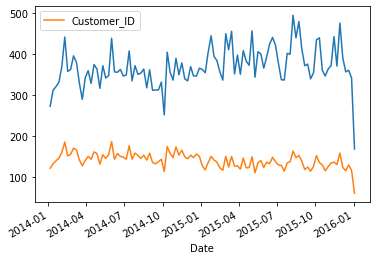

In [44]:
plt.plot(Sales_weekly)
Unique_customer_weekly.plot()
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

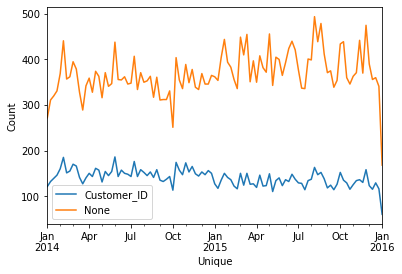

In [45]:
Unique_customer_weekly.plot()
Sales_weekly.plot()
plt.xlabel("Unique")
plt.ylabel("Count")
plt.legend()

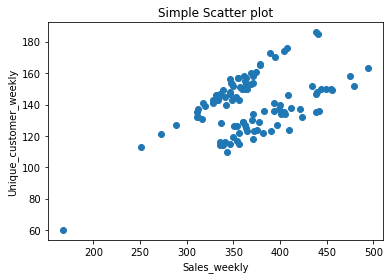

In [47]:
plt.scatter(Sales_weekly, Unique_customer_weekly)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('Sales_weekly')
plt.ylabel('Unique_customer_weekly')
plt.show()

In [48]:
print(np.corrcoef(Sales_weekly, Unique_customer_weekly))

[[1.         0.49931982]
 [0.49931982 1.        ]]


## Frequency of each Item Sold

In [49]:
frequency_of_items = df.groupby(pd.Grouper(key='Item Name')).size().reset_index(name='count')

In [50]:
frequency_of_items

,Item Name,count
0,tropical fruit,1032
1,whole milk,2502
2,pip fruit,744
3,other vegetables,1898
4,rolls/buns,1716
...,...,...
162,pudding powder,17
163,ready soups,15
164,make up remover,5
165,toilet cleaner,5


## Top 10 items by frequency

In [52]:
frequency = df.groupby('Item Name')['Item Name'].count().sort_values(ascending=False)[:10]

<AxesSubplot:xlabel='Item Name'>

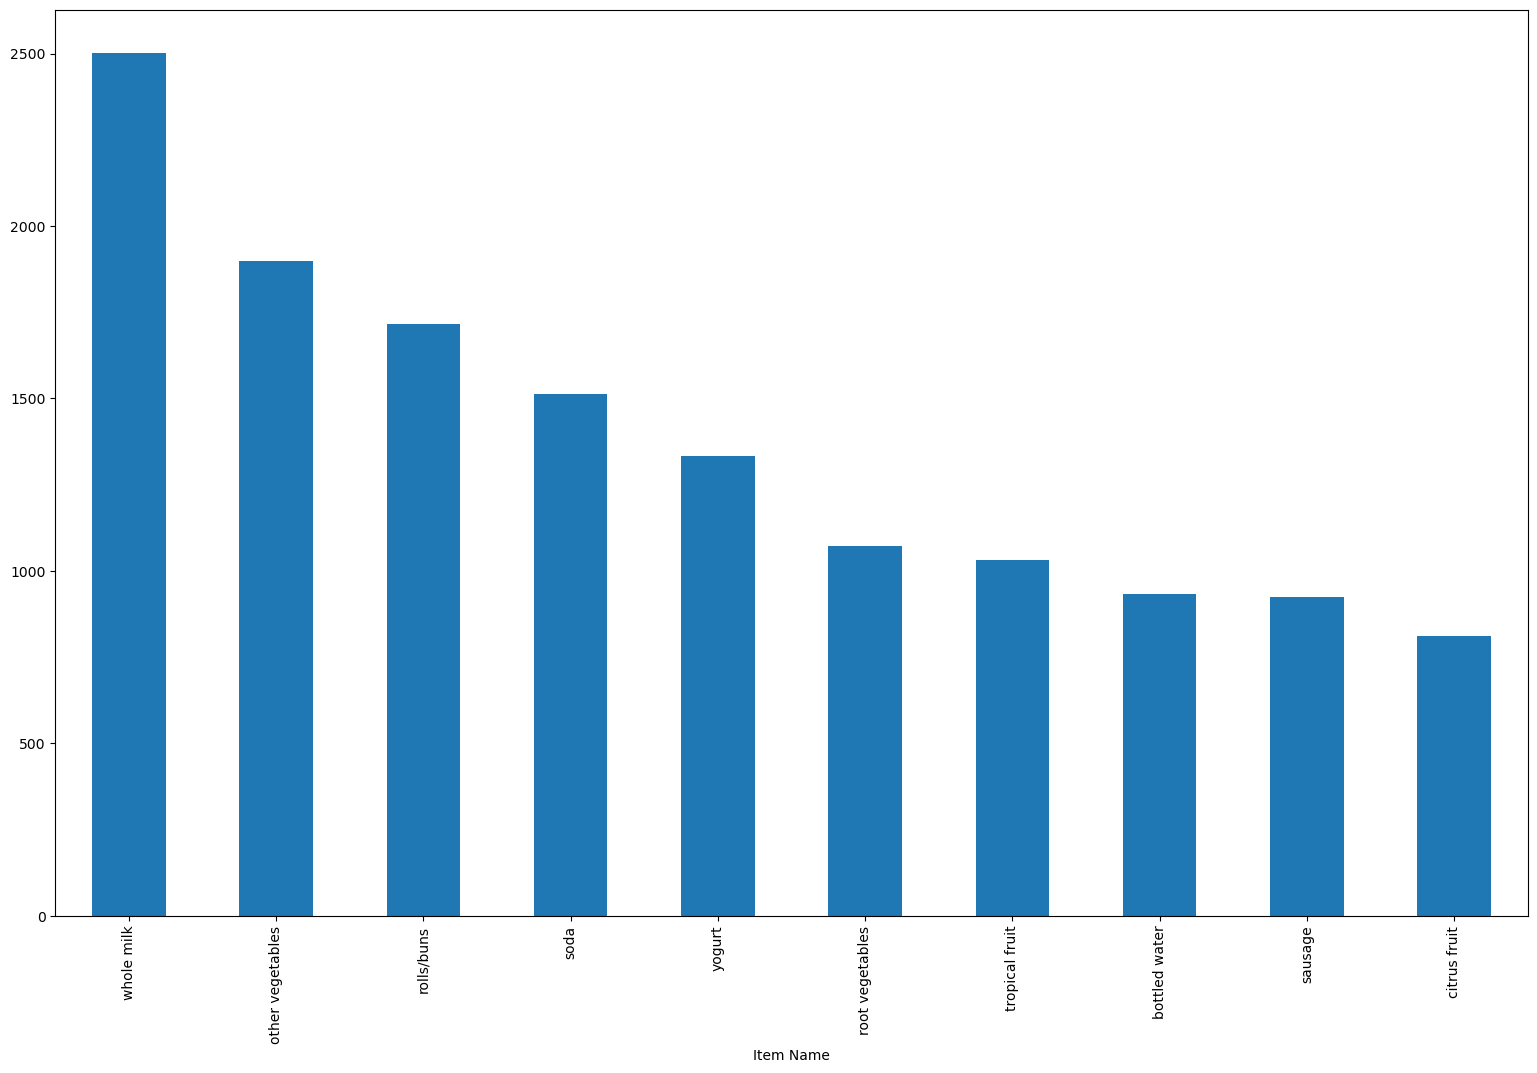

In [53]:
plt.figure(figsize=(19, 12))
frequency.plot(kind='bar')

## Number of Sales per disrete week days

<Figure size 900x400 with 0 Axes>

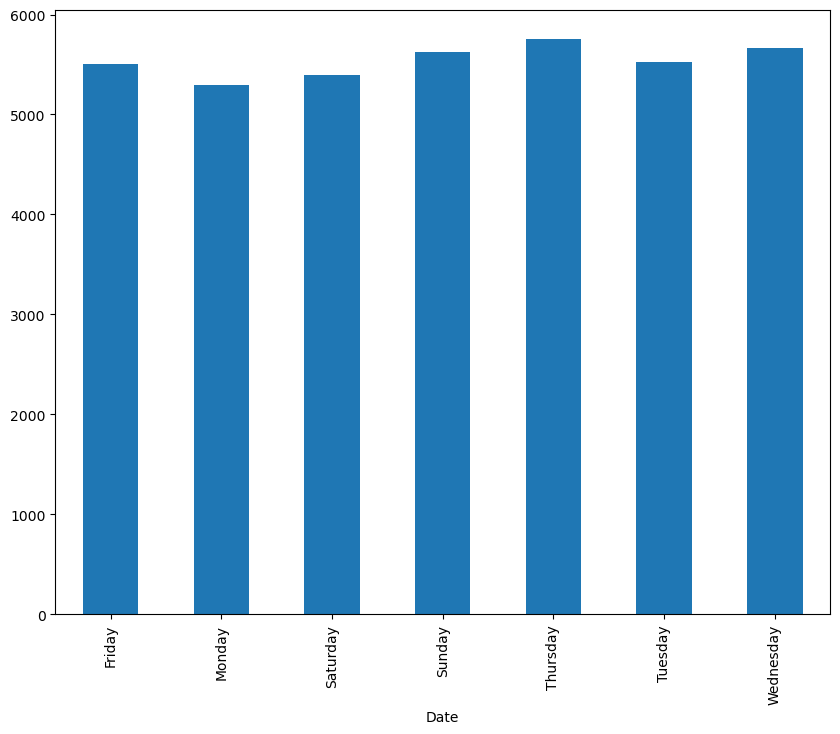

<Figure size 900x400 with 0 Axes>

In [54]:


"""
1. data['Date'].dt.strftime('%A'): This part of the code extracts the day of the week from the 'Date' column in the DataFrame 
data. The data['Date'].dt accessor allows you to access the datetime properties of the 'Date' column. strftime('%A') is a
datetime method used to format the date as the full weekday name (e.g., Monday, Tuesday, etc.).

2. data.groupby(...): The groupby() method is used to group the DataFrame data based on the day of the week (result from step 1)
It will create separate groups for each unique weekday.

3. ['itemName'].count(): After grouping, the code accesses the 'itemName' column within each group and then applies the count() 
method to calculate the number of occurrences (counts) of each 'itemName' within each weekday group.

As a result, day will be a pandas Series where the index represents the weekdays (e.g., 'Monday', 'Tuesday', etc.), and the 
values indicate the count of occurrences of each 'itemName' for each respective weekday in the original data DataFrame. This 
allows you to analyze and understand the distribution of items sold on different days of the week."""


day = df.groupby(df['Date'].dt.strftime('%A'))['Item Name'].count()

day.plot(kind = 'bar')

plt.figure(figsize=(9, 4))

## Conclusion -  Tried to identify customer buying patters based on different days of the week but no concrete conclusions can be made based on the observations
### Monday -  Starting of the week has the lowest sales

## Number of sales per discrete month

<AxesSubplot:xlabel='Date'>

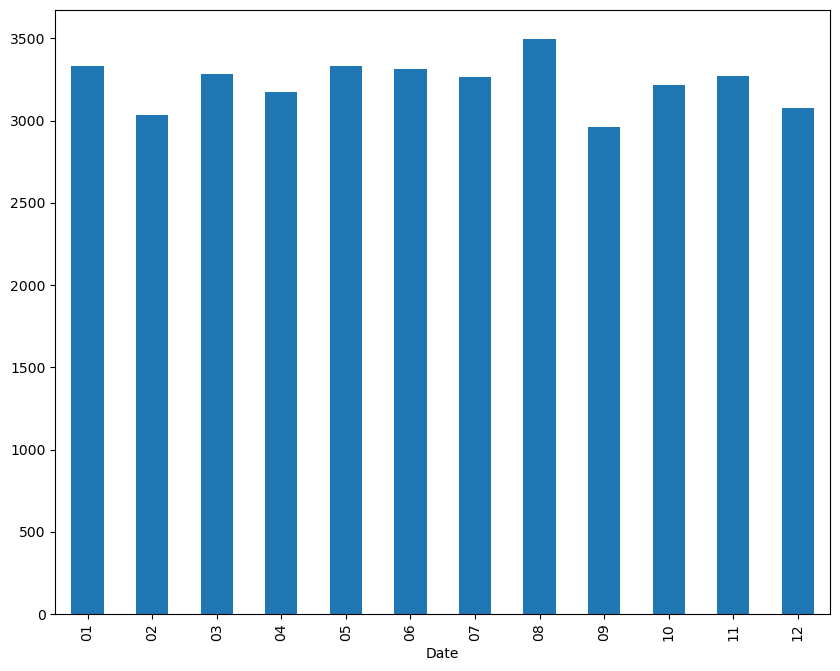

In [58]:
month = df.groupby(df['Date'].dt.strftime('%m'))['Item Name'].count()
month.plot(kind='bar')

## Lowest Sales is at the month of 'October' followed by 'February' --- 'February is here because it might has lower number of days than other months

<AxesSubplot:xlabel='Date'>

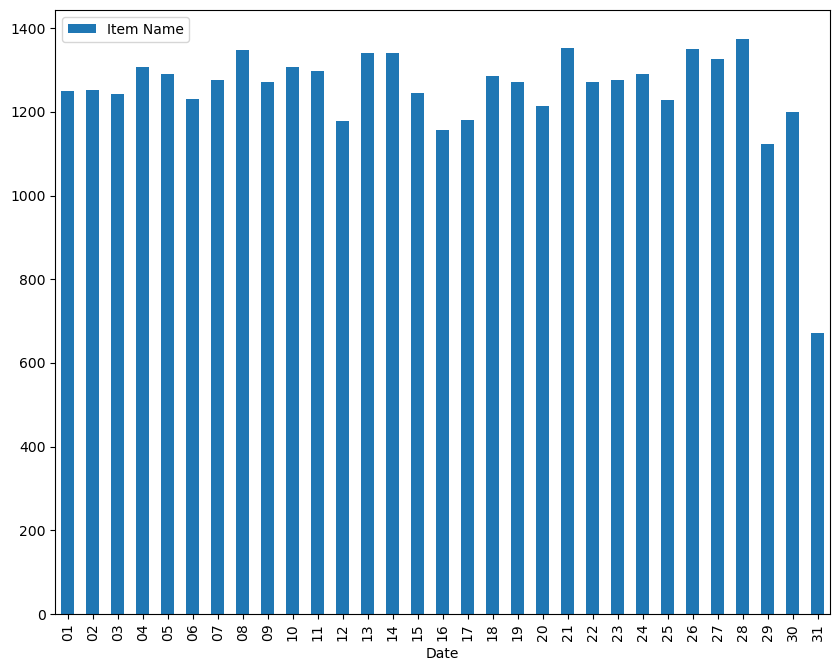

In [61]:
month_day = df.groupby(df['Date'].dt.strftime('%d'))['Item Name'].count()
month_day.plot(kind='bar')

## Creating Baskets

In [64]:
baskets = df.groupby(['Customer_ID', 'Item Name'])['Item Name'].count().unstack().fillna(0).reset_index()
baskets

# We are grouping all items bught by each customers like in the form of OHE - One Hot Encoding

Item Name,Customer_ID,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### The above dataframe represents the customers-items matrix. Each row represents the transactions of each customer, and each column represents the items bought. The numbers corresponding to the matrix represent the number of times that item is bought by the individual user.

In [65]:
# Checking if the most sold -item which is whole milk- has the same number of sales as we discussed above.

baskets['whole milk'].sum()

# this gives the same result as we got above

2502.0

In [67]:
# Encoding the items that sold more than 1
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

In [68]:
baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets_final.head()

# Applying our One hot encoding function to our basket

Item Name,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
from mlxtend.frequent_patterns import apriori, association_rules

In [72]:
# Finding the most frequent items sold together

frequent_itemsets = apriori(baskets_final, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(25)

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\acer\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
161,0.025141,"(shopping bags, butter)"
69,0.025141,(spread cheese)
405,0.025141,"(sliced cheese, whole milk)"
412,0.025141,"(specialty bar, whole milk)"
85,0.025141,"(beef, pip fruit)"
248,0.025141,"(shopping bags, domestic eggs)"
467,0.025141,"(citrus fruit, tropical fruit, whole milk)"
480,0.025141,"(frankfurter, yogurt, whole milk)"
119,0.025141,"(chocolate, bottled water)"
239,0.025141,"(dessert, root vegetables)"


In [73]:
# Creating association rules for indicating astecedent and consequent items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
877,(sausage),"(yogurt, rolls/buns)",0.035659,0.173101,1.554717
876,"(yogurt, rolls/buns)",(sausage),0.035659,0.320276,1.554717
455,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
458,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
878,(yogurt),"(sausage, rolls/buns)",0.035659,0.126020,1.530298
875,"(sausage, rolls/buns)",(yogurt),0.035659,0.433022,1.530298
944,"(yogurt, other vegetables)",(sausage),0.037199,0.309168,1.500795
945,(sausage),"(yogurt, other vegetables)",0.037199,0.180573,1.500795
631,(shopping bags),"(soda, other vegetables)",0.031042,0.184451,1.485518
630,"(soda, other vegetables)",(shopping bags),0.031042,0.250000,1.485518


## As we can see from the result above:

### sausage --> yogurt, rolls/buns

### root vegetables, whole milk --> shopping bags

### rolls/buns, soda --> sausage

### butter, whole milk --> yogurt, and etc. have strong relationships.

# RFM Analysis

In [74]:
# Calculating the Recency

# Finding last purchase date of each customer
Recency = df.groupby(by='Customer_ID')['Date'].max().reset_index()
Recency.columns = ['Customer_ID', 'LastDate']
Recency.head()

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer_ID,LastDate
0,1000,2015-11-25
1,1001,2015-04-14
2,1002,2015-08-30
3,1003,2015-10-02
4,1004,2015-02-12


In [75]:
# Finding last date for our dataset
last_date_dataset = Recency['LastDate'].max()
last_date_dataset

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('2015-12-30 00:00:00')

In [76]:
# Calculating Recency by subtracting (last transaction date of dataset) and (last purchase date of each customer)
Recency['Recency'] = Recency['LastDate'].apply(lambda x: (last_date_dataset - x).days)
Recency.head()

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer_ID,LastDate,Recency
0,1000,2015-11-25,35
1,1001,2015-04-14,260
2,1002,2015-08-30,122
3,1003,2015-10-02,89
4,1004,2015-02-12,321


### Recency Distribution of the Customers - graph

## Visit Frequency

In [82]:
# Frequency of the customer visits
Frequency = df.drop_duplicates(['Date', 'Customer_ID']).groupby(by=['Customer_ID'])['Date'].count().reset_index()
Frequency.columns = ['Customer_ID', 'Visit_Frequency']
Frequency.head()

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer_ID,Visit_Frequency
0,1000,5
1,1001,5
2,1002,4
3,1003,4
4,1004,8


### Visit Frequency Distribution of the Customers - graph

## Monetary
### Due to our dataset, we have no data regarding the price of the products. Therefore I will consider the number of item bought per user as the Monetary value.

In [84]:
Monetary = df.groupby(by="Customer_ID")['Item Name'].count().reset_index()
Monetary.columns = ['Customer_ID', 'Monetary']
Monetary.head()

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer_ID,Monetary
0,1000,13
1,1001,12
2,1002,8
3,1003,8
4,1004,21


In [ ]:
# I assumed each item has equal price and price is 10
Monetary['Monetary'] = Monetary['Monetary'] * 10
Monetary.head()

### Monetary Distribution of the Customers

In [ ]:
fig = px.histogram(Monetary, x='Monetary', opacity=0.85, marginal='box',
                   labels={'itemName': 'Monetary'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

## Combinig the above matrices to form the RFM Matrix

In [86]:
# Combining all scores into one DataFrame
RFM = pd.concat([Recency['Customer_ID'], Recency['Recency'], Frequency['Visit_Frequency'], Monetary['Monetary']], axis=1)
RFM.head()

C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer_ID,Recency,Visit_Frequency,Monetary
0,1000,35,5,13
1,1001,260,5,12
2,1002,122,4,8
3,1003,89,4,8
4,1004,321,8,21
